#Importing Libraries

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Dataset


In [185]:
from google.colab import drive
drive.mount('/content/drive')
df =pd.read_csv("/content/drive/MyDrive/dataset-test.csv",delimiter= ';')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#Understanding Dataset


Shape of Dataset


In [186]:
df.shape

(45211, 17)

Printing 5 data samples

In [187]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34974,28,admin.,single,secondary,no,177,yes,yes,cellular,6,may,150,1,-1,0,unknown,no
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
30400,33,technician,single,secondary,no,6106,no,no,cellular,5,feb,345,1,-1,0,unknown,no
16153,31,admin.,married,secondary,no,84,yes,no,cellular,22,jul,580,3,-1,0,unknown,no
29334,26,student,single,secondary,no,0,no,no,cellular,2,feb,1223,2,-1,0,unknown,yes


Data Description:


In [188]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Exploring the Basics: 

1.   Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old) 
2.   The mean balance is 1362.27 However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.




Information of dataset


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Checking for missing values

In [190]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values.


Exploring the dataset and Unique Values


In [191]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


Key Observations


1.   Output (y) has two values: "yes" and "no".
2.   default, housing and loan have 2 values each (yes,no)





In [192]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


no feature with one variable

#Exploring Categorial Features 


In [193]:
#categorical features
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [194]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


there are 9 categorical features."job" and "month" has highest number of unique categorical values

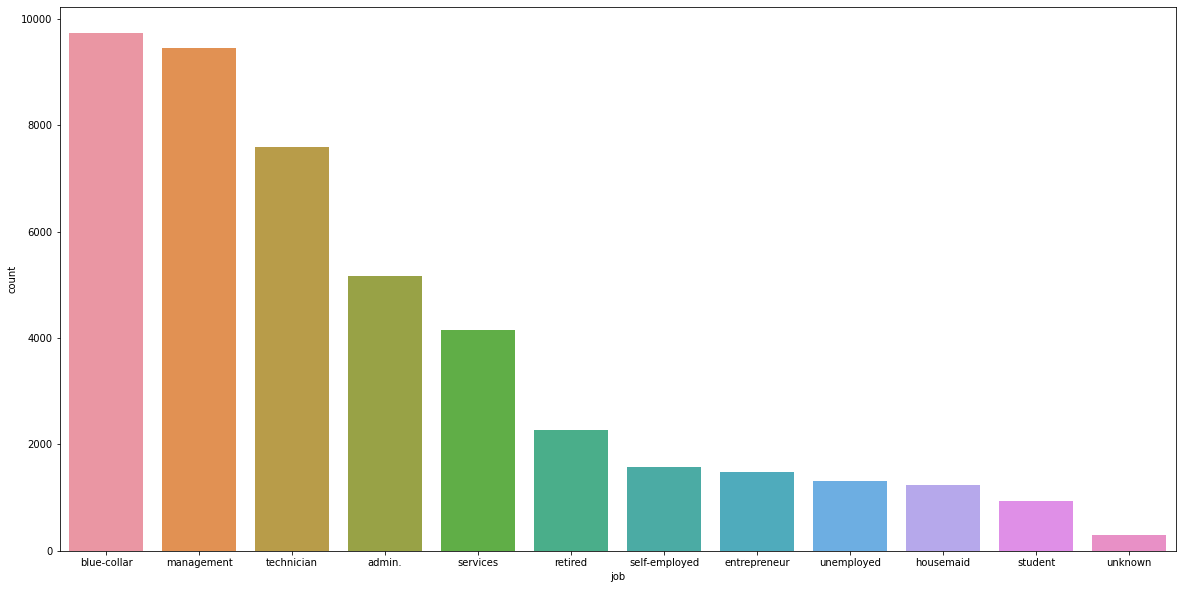

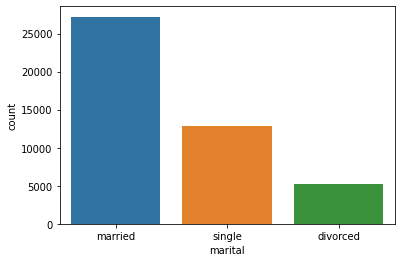

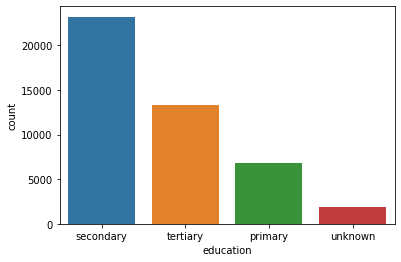

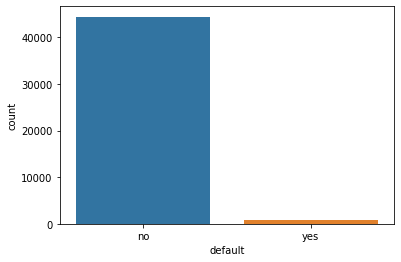

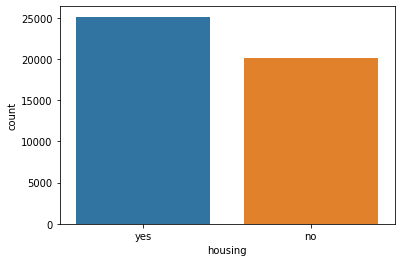

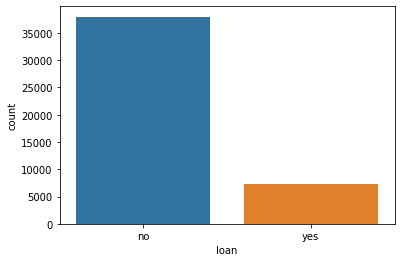

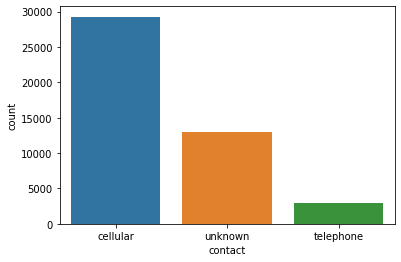

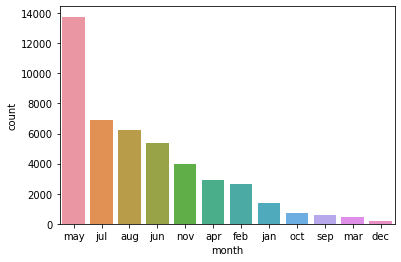

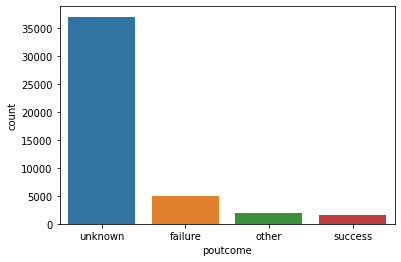

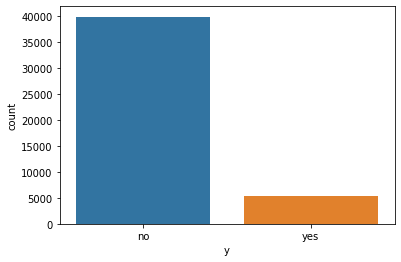

In [195]:
#Bar plots of categorical features
plt.figure(figsize=(20,10))
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(x=feature, data=df, order = df[feature].value_counts().index)
    plt.show()

Key Observation:


1.   client with job type as blue-collar records are high in given dataset and students are least in general as they don't make term deposits in general.
2.   client who married are high in records in given dataset and divorced are less
3.   client whoes education background is secondary are in high numbers in given dataset
4.   default feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
5.  data in month of may is high and less in december
  



#Bivariate Analysis

In [196]:
 #job vs y
print(pd.crosstab(df['job'],df['y']))

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


In [197]:
job = pd.crosstab(df['job'],df['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

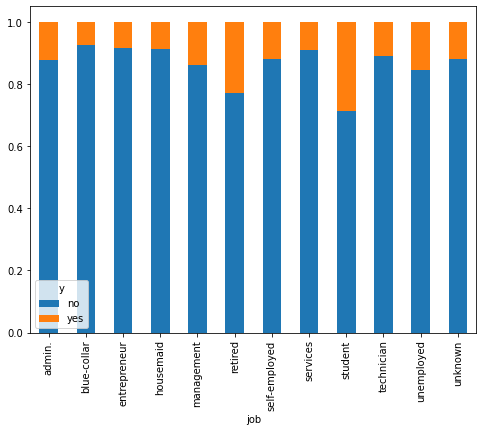

In [198]:
job_norm.plot.bar(stacked=True,figsize=(8,6))

Key Observation:


*   From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.



In [199]:
#Marital status vs subscribed
pd.crosstab(df['marital'], df['y'])

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [200]:
marital = pd.crosstab(df['marital'], df['y'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

y,no,yes
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


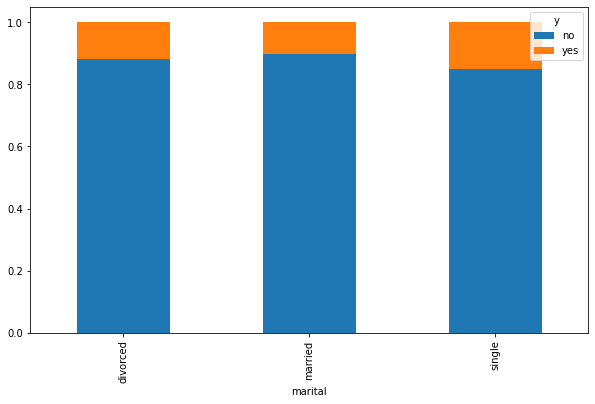

In [201]:
marital_norm.plot.bar(stacked=True, figsize=(10,6))

Key Observation:


*   From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.




In [202]:
#default vs subscription
pd.crosstab(df['default'], df['y'])


y,no,yes
default,,
no,39159,5237
yes,763,52


In [203]:
dflt = pd.crosstab(df['default'], df['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,no,yes
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


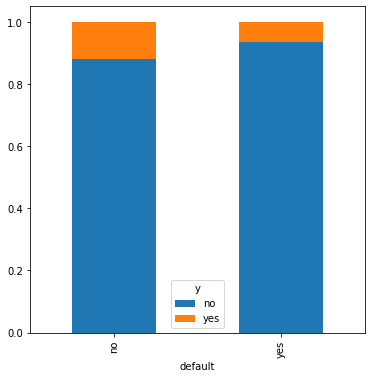

In [204]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

Key Obervation


*   We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.



#Exploring Numerical Features

In [205]:
##exploring numerical data
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()


Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [206]:
##Find Discrete Numerical Features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


there is no Discrete Variables in give dataset

In [207]:
##find Continous Numerical Features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


there are 7 continuous numerical features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

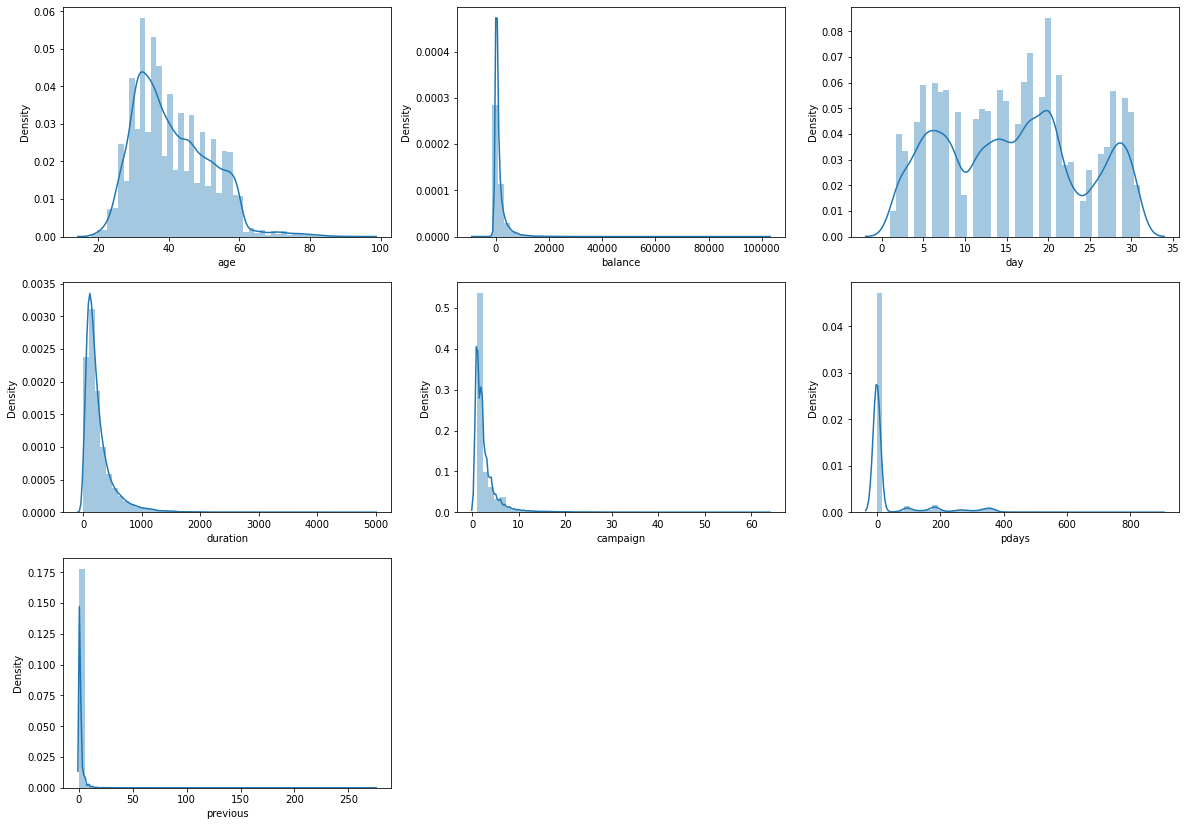

In [208]:
##Distribution of Continous Numerical Features
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()


Key Observations


1.   age, days distributed normally
2.   balance, duration, compaign, pdays and previous heavely skewed towards left 





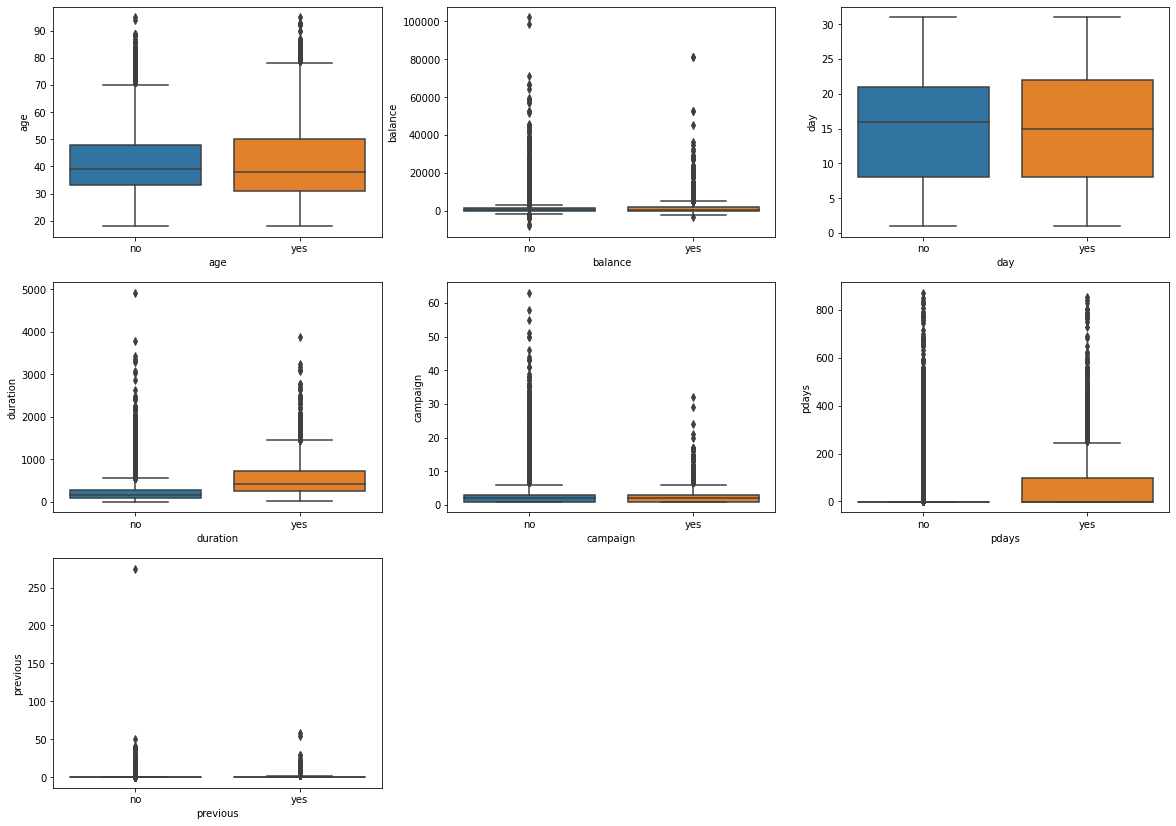

In [209]:
#Relation between Continous numerical Features and Labels
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Key Observation


*   client shows interest on deposit who had discussion for longer duration




**Find Outliers in numerical features**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

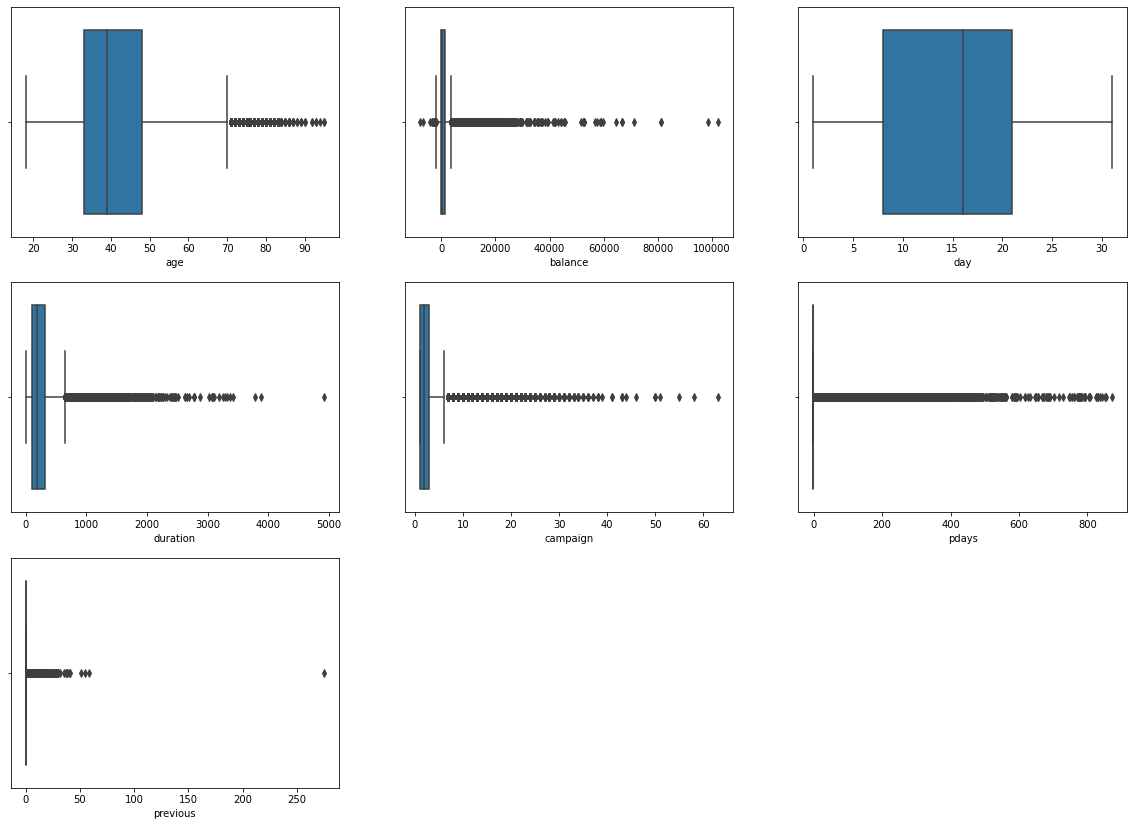

In [210]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Key Observation:


*   age, balance, duration, compaign, pdays and previous has some outliers







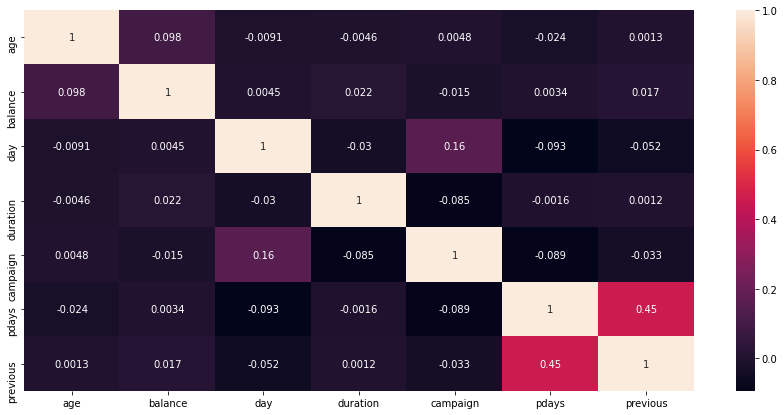

In [211]:
##Explore the Correlation between numerical features
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

it seems no feature is heavily correlated with other features

In [212]:
# Converting the target variables into 0s and 1s
df['y'].replace('no', 0,inplace=True)
df['y'].replace('yes', 1,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [213]:
df2 = pd.get_dummies(data=df, columns=['job','marital','education','housing','loan','contact','month','poutcome'])
df2.columns

Index(['age', 'default', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

**Check the Data set is balanced or not based on target values in classification**


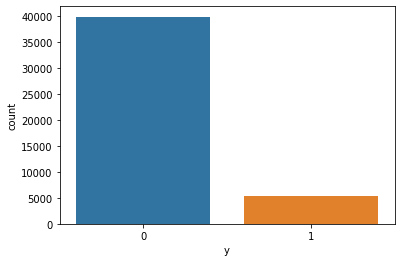

In [214]:
sns.countplot(x='y',data=df)
plt.show()

In [215]:
df['y'].groupby(df['y']).count()

y
0    39922
1     5289
Name: y, dtype: int64

Key Observation


*   given dataset seems to be imbalanced.



#Feature Engineering



*  Drop unwanted Features 
*  Handle Missing Values
*   Handle Categorical Features
*   Handle Feature Scalling
*   Remove Outliers 


As per Exploratory Data Analysis EDA,

*   no missing value found
*   no feature found with one value
*   9 categorical features
*   default features does not play imp role
*   it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)









In [216]:
df2.groupby(['y','default']).size()

y  default
0  no         39159
   yes          763
1  no          5237
   yes           52
dtype: int64

In [217]:
df2.drop(['default'],axis=1, inplace=True)

In [218]:
df2.groupby(['y','pdays']).size()

y  pdays
0  -1       33570
    1           9
    2          35
    3           1
    4           1
            ...  
1   804         1
    805         1
    828         1
    842         1
    854         1
Length: 914, dtype: int64

drop pdays as it has -1 value for around 40%+ 


In [219]:
df2.drop(['pdays'],axis=1, inplace=True)

 remove outliers in feature age

In [220]:
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [221]:
# remove outliers in feature balance...
df2.groupby(['y','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

y  balance
0  -8019      1
   -6847      1
   -4057      1
   -3372      1
   -3313      1
             ..
1   34646     1
    36252     1
    45248     1
    52587     2
    81204     2
Name: balance, Length: 9258, dtype: int64

In [222]:
# remove outliers in feature duration...
df2.groupby(['y','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

y  duration
0  0            3
   1            2
   2            3
   3            4
   4           15
               ..
1  3094         1
   3102         1
   3183         1
   3253         1
   3881         1
Name: duration, Length: 2627, dtype: int64

In [223]:
# remove outliers in feature campaign...
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y  campaign
0  1           14983
   2           11104
   3            4903
   4            3205
   5            1625
               ...  
1  20              1
   21              1
   24              1
   29              1
   32              1
Name: campaign, Length: 70, dtype: int64

In [224]:
df3 = df2[df2['campaign'] < 39]

In [225]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y  campaign
0  1           14983
   2           11104
   3            4903
   4            3205
   5            1625
   6            1199
   7             688
   8             508
   9             306
   10            252
   11            185
   12            151
   13            127
   14             89
   15             80
   16             77
   17             63
   18             51
   19             44
   20             42
   21             34
   22             23
   23             22
   24             19
   25             22
   26             13
   27             10
   28             16
   29             15
   30              8
   31             12
   32              8
   33              6
   34              5
   35              4
   36              4
   37              2
   38              3
1  1            2561
   2            1401
   3             618
   4             317
   5             139
   6              92
   7              47
   8              32
   9              21
 

In [226]:
# remove outliers in feature previous
df3.groupby(['y','previous'],sort=True)['previous'].count()

y  previous
0  0           33556
   1            2189
   2            1650
   3             848
   4             543
               ...  
1  26              1
   29              1
   30              1
   55              1
   58              1
Name: previous, Length: 66, dtype: int64

In [227]:
df4 = df3[df3['previous'] < 48]

In [228]:
df4

,age,balance,day,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#Under Sampling

In [229]:
# Class count
count_class_0, count_class_1 = df4.y.value_counts()

# Divide by class
df_class_0 = df4[df4['y'] == 0]
df_class_1 = df4[df4['y'] == 1]


In [230]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())


Random under-sampling:
1    5287
0    5287
Name: y, dtype: int64


In [231]:
X = df_test_under.drop('y',axis='columns')
y = df_test_under['y']

from sklearn.model_selection import train_test_split
X_trainU, X_testU, y_trainU, y_testU = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [232]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'balance', 'day', 'duration', 'campaign','previous']
df_test_under[columns_to_scale] = standardScaler.fit_transform(df_test_under[columns_to_scale])
df_test_under.head()

,age,balance,day,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
43899,0.729666,0.440403,-0.773897,0.984257,-0.184528,-0.392075,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
13322,0.310856,-0.486123,-0.892933,0.000285,-0.582003,-0.392075,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
37234,0.310856,0.391130,-0.297750,-0.946716,-0.582003,-0.392075,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
455,0.227094,-0.400674,-1.131007,0.094132,-0.582003,-0.392075,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
14084,-0.359240,-0.486123,-0.535823,1.507526,-0.184528,-0.392075,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [233]:
X_trainU[columns_to_scale] = standardScaler.fit_transform(X_trainU[columns_to_scale])
X_testU[columns_to_scale] = standardScaler.fit_transform(X_testU[columns_to_scale])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

#Over Sampling


In [234]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.y.value_counts())

Random over-sampling:
1    39906
0    39906
Name: y, dtype: int64


In [235]:
X = df_test_over.drop('y',axis='columns')
y = df_test_over['y']

from sklearn.model_selection import train_test_split
X_trainO, X_testO, y_trainO, y_testO = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [236]:
df_test_over[columns_to_scale] = standardScaler.fit_transform(df_test_over[columns_to_scale])
df_test_over.head()

,age,balance,day,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.399030,0.181948,-1.249642,-0.332885,-0.570589,-0.397126,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.228308,-0.462799,-1.249642,-0.642761,-0.570589,-0.397126,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,-0.691545,-0.471034,-1.249642,-0.854039,-0.570589,-0.397126,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.479177,-0.012330,-1.249642,-0.808966,-0.570589,-0.397126,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,-0.691545,-0.471339,-1.249642,-0.510359,-0.570589,-0.397126,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [237]:

X_trainO[columns_to_scale] = standardScaler.fit_transform(X_trainO[columns_to_scale])
X_testO[columns_to_scale] = standardScaler.fit_transform(X_testO[columns_to_scale])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

#Models

In [238]:
# will try to use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [239]:
from sklearn.model_selection import cross_val_score
model_scoreU =cross_val_score(estimator=RandomForestClassifier(),X=X_trainU, y=y_trainU, cv=10)
print(model_scoreU)
print(model_scoreU.mean())

[0.85933806 0.86288416 0.86170213 0.87234043 0.85815603 0.86170213
 0.86524823 0.86643026 0.86879433 0.8556213 ]
0.8632217046455999


In [240]:
model_scoreO =cross_val_score(estimator=RandomForestClassifier(),X=X_trainO, y=y_trainO, cv=10)
print(model_scoreO)
print(model_scoreO.mean())

[0.96914644 0.97118246 0.96898982 0.9688332  0.96585748 0.96523101
 0.96711042 0.96413469 0.96805012 0.96882832]
0.9677363951185718


oversampling worked better than undersampling

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

**Logistic Regression**

In [242]:
lr = LogisticRegression()
lr.fit(X_trainO,y_trainO)
y_pred = lr.predict(X_testO)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
acc_lr = accuracy_score(y_testO,y_pred)
f1_lr = f1_score(y_testO,y_pred)
print(acc_lr)
print(f1_lr)
algorithms.append('lr')
mean_acc_scores.append(acc_lr)
mean_f1_scores.append(f1_lr)


0.833991104428992
0.8310595435420121


**KNN**

In [243]:
knn_classifier=KNeighborsClassifier(n_neighbors = 100)
knn_classifier.fit(X_trainO,y_trainO)
y_pred_knn = knn_classifier.predict(X_testO)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_testO,y_pred_knn)
f1_knn = f1_score(y_testO,y_pred_knn)
print(acc_knn)
print(f1_knn)

0.8353692914865627
0.8313005520605984


**Random Forest**

In [244]:
model1= RandomForestClassifier()
model1.fit(X_trainO,y_trainO)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [245]:
model_rn = model1.predict(X_testO)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
acc_rn = accuracy_score(y_testO,model_rn)
f1_rn = f1_score(y_testO,model_rn)
print(acc_rn)
print(f1_rn)

0.9704942679947378
0.9713276922140379


XGB Classifier

In [246]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [247]:
model_xgb.fit(X_trainO,y_trainO)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [248]:
model_xgb1 = model_xgb.predict(X_testO)
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
acc_xgb1 = accuracy_score(y_testO,model_xgb1)
f1_xgb1 = f1_score(y_testO,model_xgb1)
print(acc_xgb1)
print(f1_xgb1)

0.9294618805988849
0.9319719671338811


**Confusion Matrix for random forest**

In [249]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testO,model1.predict(X_testO))




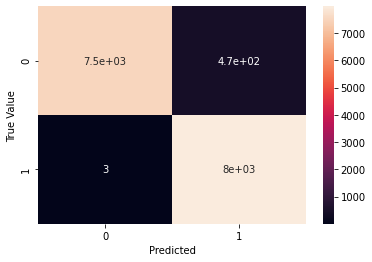

In [250]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()


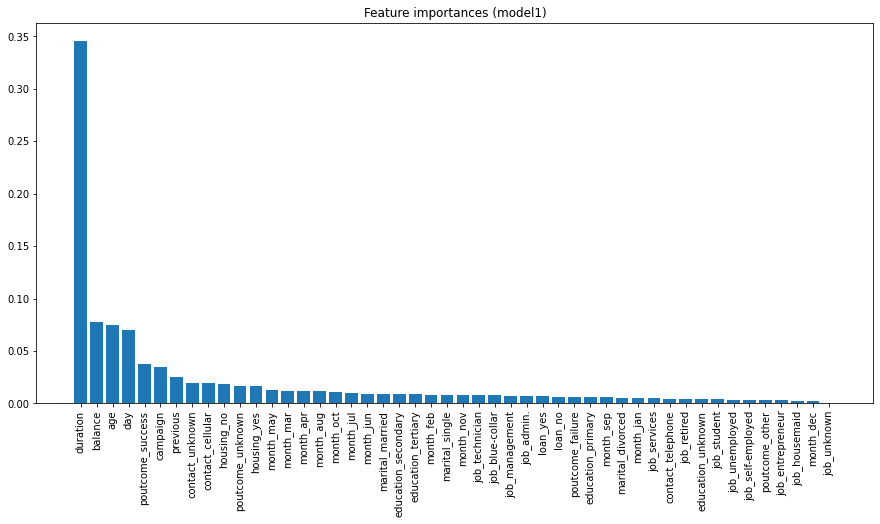

In [251]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_trainO.columns, model1.feature_importances_), key=lambda x: x[1] * -1)
model1_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(model1_feature_importances))
plt.bar(x_pos, model1_feature_importances['score'])
plt.xticks(x_pos, model1_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (model1)')

plt.show()



*   Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.
*   Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.

*   the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.

*   A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.








